# CMSE 381 Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification, make_regression


# Introduction

The objective of this project is to apply machine learning techniques to two real-world healthcare datasets to demonstrate the application of regression and classification models. Using the Heart Failure Clinical Records dataset, the goal is to predict patient outcomes related to heart failure, focusing on regression analysis to model survival prediction based on clinical features. The Cervical Cancer (Risk Factors) dataset will be used to perform a classification task, aiming to predict the presence of cervical cancer based on demographic and health-related risk factors. The project will explore the datasets through exploratory data analysis, preprocess the data, and apply models including Logistic Regression for classification and Linear Regression for regression. The performance of these models will be evaluated using metrics like accuracy, precision, recall, F1-score, mean squared error (MSE), and R², with insights derived to guide further improvements in prediction accuracy. Additionally, K-fold cross-validation and parameter tuning will be used to enhance model performance and reduce overfitting.

- Datasets:
    - Cervical Cancer(Risk Factors): Used for classification, predicting death event based on risk factors
    - Heart Failure Clinical Records: Used for regression, predicting patient outcomes based on clinical features


## Dataset Description

- Cervical Cancer: 
    - Features: Age, Number of sexual partners, first sexual intercourse(age), num of pregnancies, smokes, smokes(years), smokes(packs/year), hormonal contraceptives, hormonal contraceptives(years), IUD, IUD(years), STDs, STDs(numbers), STDs:condylomatosis, STDs:cervical condylomatosis, STDs:vaginal condylomatosis, STDs:vulvo-perineal condylomatosis,  STDs:syphilis, STDs:pelvic inflammatory disease, STDs:genital herpes, STDs:molluscum contagiosum, STDs:AIDS, STDs:HIV, STDs:Hepatitis B, STDs:HPV, STDs: Number of diagnosis, STDs: Time since first diagnosis, STDs: Time since last diagnosis, Dx:Cancer, Dx:CIN, Dx:HPV, Dx, Hinselmann: target variable, Schiller: target variable, Cytology: target variable, Biopsy: target variable
    - Target: Traget is the biopsy to determine if has does or does not have cervical cancer
    - Data Source: From the UCI ML repository
    
- Stock Protfolio Performance
    - Features: period, ID, Large B/P, Large ROE, Large S/P, Large Return Rate in the last quarter, Large Market Value, Small systematic Risk, Annual Return, Excess Return, Systematic Risk, Total Risk, Abs. Win Rate, Rel. Win Rate, Annual Return, Excess Return, Systematic Risk, Total Risk, Abs. Win Rate, Rel. Win Rate
    - Target: Annual Return
    - Data Source: From the UCI ML repository




In [2]:
cancer = pd.read_csv("risk_factors_cervical_cancer.csv")
heart = pd.read_csv("heart_failure_clinical_records_dataset.csv")

cancer.head(), heart.head()


(   Age Number of sexual partners First sexual intercourse Num of pregnancies  \
 0   18                       4.0                     15.0                1.0   
 1   15                       1.0                     14.0                1.0   
 2   34                       1.0                        ?                1.0   
 3   52                       5.0                     16.0                4.0   
 4   46                       3.0                     21.0                4.0   
 
   Smokes Smokes (years) Smokes (packs/year) Hormonal Contraceptives  \
 0    0.0            0.0                 0.0                     0.0   
 1    0.0            0.0                 0.0                     0.0   
 2    0.0            0.0                 0.0                     0.0   
 3    1.0           37.0                37.0                     1.0   
 4    0.0            0.0                 0.0                     1.0   
 
   Hormonal Contraceptives (years)  IUD  ... STDs: Time since first diagnosis 

# Classification

- Exploratory Data Analysis:
    - Check for missing values, data types, etc.
    - Visualize the data
    - Analyze class imbalance
    - Analyze feature distribution and correlations
- Data Cleaning:
    - Handle Missing values (replace with NaN, then drop of impute)
    - Remove or drop unnecessary columns
    - Convert categorical variables if needed
    - Address outliers
    - Encode categorical variables
- Model Building:
    - Choose classification model
    - Split data into training and testing sets
    - Train model on the training data
- Model Evaluation:
    - Evaluate the model using metrics like accuracy, precision, recall, and F1-score
    - Perform cross-validation for robust performance evaluation
- Model Tuining:
    - Optimize hyperparameters
- Final Model
    - Train model with the best hyperparameters
    - Make predictions

In [3]:
# Importing the dataset
cancer = pd.read_csv("risk_factors_cervical_cancer.csv")
cancer

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


## Cleaning Data

In [4]:
#Replacing any question marks with NaN
cancer.replace("?", np.nan, inplace = True)
#Removing these two columns since lacked any data 
columns_to_remove = ['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis']
cancer = cancer.drop(columns_to_remove, axis=1)
cancer

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [5]:
#Dropping NaN since minimal amount lacked any change within the data
cancer.dropna(inplace=True)
cancer

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,0,0


 ## EDA for Classification

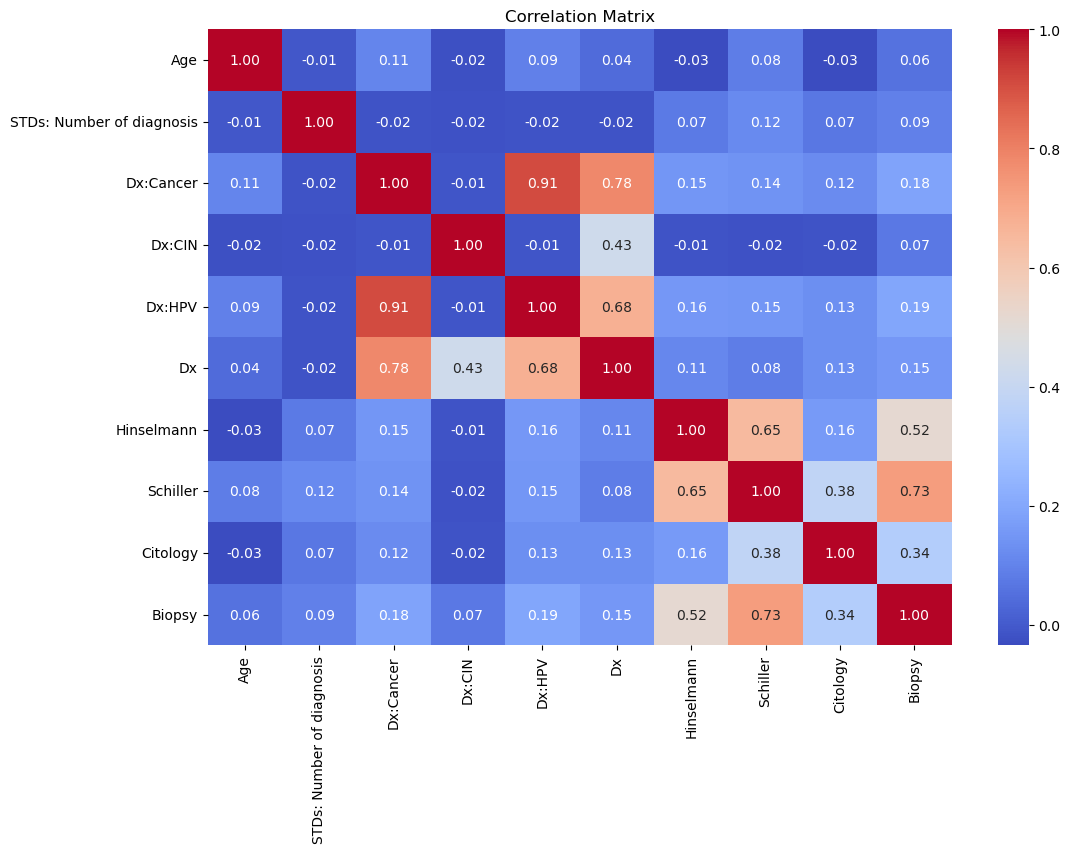

In [6]:
#Seperate Biopsy since it is target variable for classificantion
X_clf = cancer.drop('Biopsy', axis=1)  
y_clf = cancer['Biopsy']


#Basic Heatmap to check for any correlations
plt.figure(figsize=(12, 8))
sns.heatmap(cancer.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


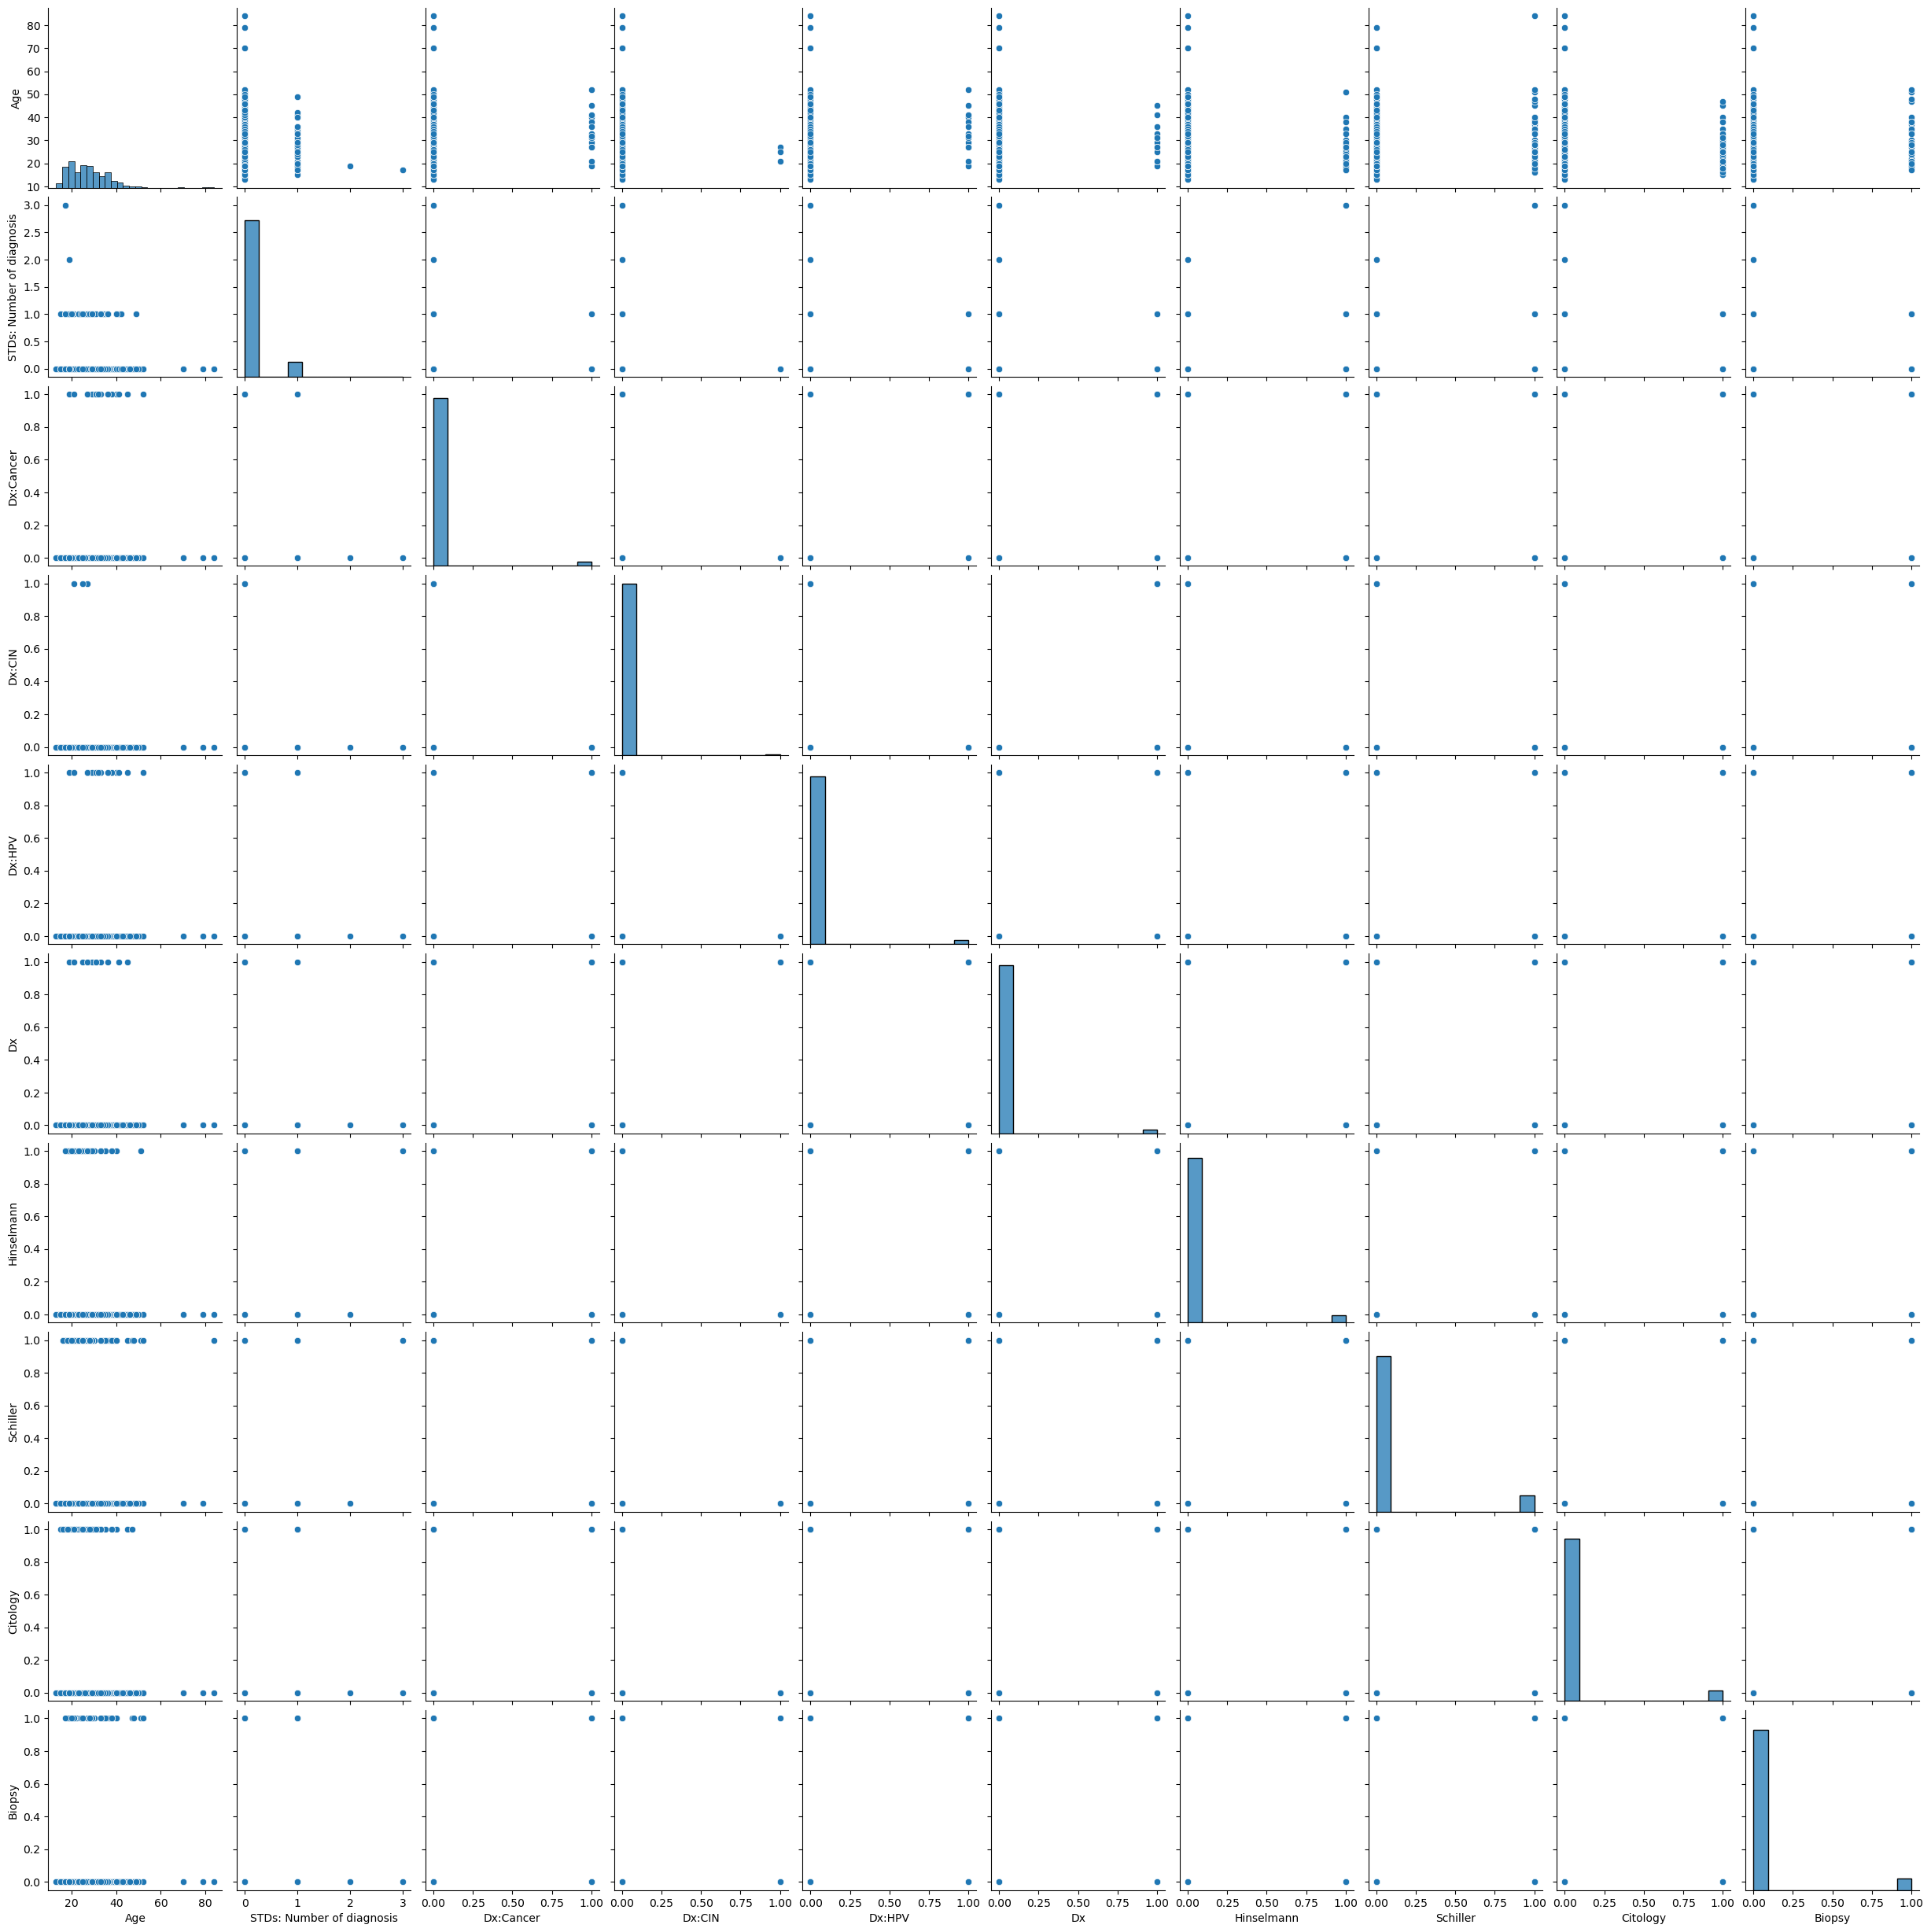

In [7]:
#Pairplot to see plots of data compared against each other
sns.pairplot(cancer)
plt.show()

## Logistic Regression Model

In [8]:
#Spliting the data into training and test sets. 70% training, 30% testing
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(X_clf, y_clf, test_size=0.3, random_state=42)

#This initalizes the Logistric Regression model. 1000 max iterations
log_reg = LogisticRegression(max_iter=1000)

#Train the logistic regression model with the training data from the split
log_reg.fit(X_clf_train, y_clf_train)

#This makes the predictions on the testing set
y_clf_pred = log_reg.predict(X_clf_test)

#Records and evaluates the model's performance, calculates the accuracy score
accuracy = accuracy_score(y_clf_test, y_clf_pred)

print("\nClassification Model Accuracy:", accuracy)


Classification Model Accuracy: 0.9502487562189055


- The classification model uses Logistic Regression to predict whether a patient has cervical cancer based on risk factors. The dataset is split into training and testing sets, with 70% of the data used for training the model and 30% for testing its performance.

- Model Initialization: A logistic regression model is created with a maximum of 1000 iterations to ensure the algorithm converges, especially for complex data.

- Model Training: The model is trained on the training dataset using the fit() method, which allows the model to learn the relationship between the features and the target variable (whether the patient has cancer or not).

- Prediction: After training, the model predicts the outcomes on the test set (unseen data) using predict().

- Evaluation: The model's performance is then evaluated by calculating the accuracy score, which indicates the percentage of correctly classified instances in the test set.

- This simple but effective approach provides an initial understanding of how well the logistic regression model is performing on the classification task. Further evaluation (e.g., precision, recall, F1-score) will provide more detailed insights into the model's effectiveness, especially in cases where the classes may be imbalanced.

- We can see that using the logistic regression model that the accuracy score when preidcting if a given patient has cervical cancer is around 95% accurate which is really good. While this does appear to be really good this accuracy score could be misleading if this dataset is imbalanced. For example (not neccessarily this dataset), if the dataset has a lot more samples from one class (patients with/out cancer), a model will always predict the greaters class could still have a high accuracy, even though it may not be effective in predicting the minority class. With this possible problem in datasets it is also important to look at other metrics when measuring how good a model is doing such as precision, recall and the F1-score.

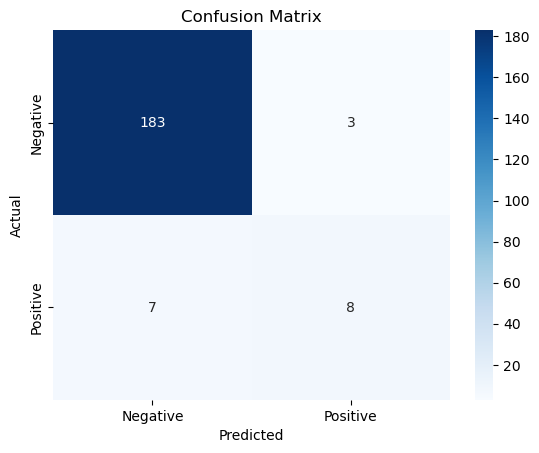


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       186
           1       0.73      0.53      0.62        15

    accuracy                           0.95       201
   macro avg       0.85      0.76      0.79       201
weighted avg       0.95      0.95      0.95       201



In [9]:
#Turns confusion matrix into a heatmap
conf_matrix = confusion_matrix(y_clf_test, y_clf_pred)

#Heatmap for the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_clf_test, y_clf_pred))

- Confusion Matrix:
    - The confusion matrix is a performence measurment for classification. It allows us to better visualize the comparison between the actual and predicted values in the test dataset.

    - Components:
        - True Negative: Correctly predicted negatives
        - True Positives: Correctly predicted positives
        - False Negatives: Positive samples incorrectly classified as negative
        - False Positives: Negative sames incorrectly classied as positive
        
- Heatmap:
    - The confusion matrix is visualized using a heatmap with annotations. Each cell displays the corresponding count of samples, allowing for easy understanding.
    - The color on the map represents the density.


- Classification Report:
    - The classification report provides a detailed report of the classification performance on the given data.
        - Precision: Ratio of correctly predicted positive observations to total predicted positives. A higher precision minimizes false positives. When looking at the report we can see that there is a 0.96 presison ratio when predicting negative results, but then has a precision of 0.73 when predicting positives. That definetly could stem from the fact that this dataset is heavier on the negative biopsy's than positive so it does a better job predicting negatives when since there is more data for that. 
        - Recall (sensitivity): Ratio of correctly predicted positive observations to actual positives. High recall minimizes false negatives. In this report we see that it has a recall of 0.98 when it comes to predicting negatives compared to 0.53 when predicting positives. Again this follows suit with the data having a lot more negatives then positives so the model can more accurately predict negatives over than positives.
        - F1-Score: Harmonic mean of precision and recall, providing a balanced metric. We see that when predicting negative biopsy there is and F1-score of 0.97 and then for positives it has a F1-score of 0.62. When it comes to predicting negatives we are aware that it does a much better job because there are more negatives than positives. But compared to the overwhellingly difference in amount of negatives compared to positives, the model when predicting positives still has a relatively good F1-score meaning even though there is not a lot of data falling into positives the model is still doing a decent job picking it up.
        - Support: This is the total of actual occurrences of each class. As mentioned above, before we even see the totals we can start to assume that the data is heavier on negatives than it is positives, and the support shows that. Negative has 186 and then positive has 15. This model is overwhellingly heavy towards negative which could skew the score of this model.
    
 

## Hyperparamter Tuning

In [10]:
from sklearn.model_selection import GridSearchCV

# Set the hyperparameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength (smaller C means stronger regularization)
    'solver': ['liblinear', 'saga'],  # Different algorithms
    'max_iter': [1000, 2000]  # Number of iterations
}

# Create a GridSearchCV object. Helps find best combination of hyperparameters for most accurate model
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model on the training data
grid_search.fit(X_clf_train, y_clf_train)

# Prints the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Use the best estimator to make predictions
best_model = grid_search.best_estimator_
y_clf_pred = best_model.predict(X_clf_test)

# Evaluate the best model
accuracy = accuracy_score(y_clf_test, y_clf_pred)
print("Accuracy of Best Model:", accuracy)


Best Hyperparameters: {'C': 100, 'max_iter': 1000, 'solver': 'liblinear'}
Accuracy of Best Model: 0.945273631840796


- Hyperparameter Tuining:
    - Logistic regression has severl hyperparameters that play a part in its performance.
        - C: Controls regularization strength. Smaller C values prevent overfitting my penalizing larger coeffiecents. In this instance there are C values of 0.01, 0.1, 1, 10, 100. Out of all of these different C values for creating the best model with the best performance a C value of 100 is the best option. 
        - Solver: Helps determine the optimization algorthim for finding the best fit. Liblinear is better suited for smaller datasets, while on the other hand saga is better suited for larger datasets. In this case this is a relatively small dataset for this model so it makes sense as to why liblinear would be a better option ot maximize performance. 
        - Max_iter: Helps ensures that the solver has enough iterations to converge. In this case while it is a smaller dataset, the max iteration of 1000 is better suited for this parameter compared to 2000. 

- Cross-Validation:
    - In this model I chose to split the training data into 5 different subsets. The model is trained on 4 of the subsets and then is validated on the 5th subset. The process of training on 4 and validating on the 5th will repeat 5 times throughout the entirety of the subsets. Doing this process will help minimize overfitting.
    
- Best Parameters:
    - C=100: This large value of C means that there is weaker regularization, that also means that the model allowes larger coeffiencents and can fit the data more closely. This will lead to suggest that the data is not very complexy or contains a lot of noise, thus less regulaization can lead to a better performance of the model.
    - Max_iter = 1000: In this case the dataset is considered a small dataset, and only needs 1000 iterations for the model to find an optimal solution. This parameter of 1000 iterations ensures that the model has adequate computational cycles to reach convergence. 
    - Solver = liblinear: The liblinear solver is a good choice for smaller datasets. It supports L1 and L2 regularization making it a great algorthim for logistic regression
    
- Model Accuracy:
    - The accuracy for the best model came out to 0.945. Suggesting that the models does a great job classifying and generalizes well to unseen data. The high accuracy that is shown demonstrates that the hyperparameters that were slected provide and great fit with minimal overfitting or underfitting. 

 ## Polynomial Features

In [11]:
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial features to be used for this model
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_clf)


# Split the data again with the new features
X_clf_train_poly, X_clf_test_poly, y_clf_train, y_clf_test = train_test_split(X_poly, y_clf, test_size=0.3, random_state=42)

# Train a Logistic Regression model with the new polynomial features
log_reg_poly = LogisticRegression(max_iter=1000)
log_reg_poly.fit(X_clf_train_poly, y_clf_train)

# Make predictions and evaluate
y_clf_pred_poly = log_reg_poly.predict(X_clf_test_poly)
accuracy_poly = accuracy_score(y_clf_test, y_clf_pred_poly)
print("Accuracy with Polynomial Features:", accuracy_poly)


Accuracy with Polynomial Features: 0.9353233830845771


C:\Users\zlaro\Downloads\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- Incoperating Polynomial Features in Logistic Regression
    - To enhance the predictive performance of the logistic regression model, polynomial features were introduced into the dataset. This method generates new features by combining the original ones, allowing the model to capture non-linear relationships between predictors. The process involved:

- Feature Transformation:
    - In this case polynomial features of degree 2 were generated. It contianed:
        - The original features
        - Squared values of each feature
        - Intergation terms

- Model Training:
    - The dataset was transformed again and was split into 70% training and 30% testing subsets to be used for throughout this process.
    - A new logistic regression model was trained on the new feature set using 1000 iteration. This is due to a smaller dataset but still large enough to where the there would still be enough iterations for convergence.
    
 - Model Evaluation:
     - This model achived an accuracy of 0.935 on the test set. It demonstated its effectiveness in identifying non-linear patterns in the data. This score indicated that the degree of polynomial that was chosen (degree 2) is effective at enhancing the model performance wthout adding any extra noise. This high score also indicates that there are non-linear features within this data due to the degree being 2. One thing to consider though is that this polynomial feature score is lower than hyperparameter tuning and the logistic regression model. While it is only a few points lower it does not mean it is worse off than the other two.

##  K-Fold Cross-Validation

In [12]:
from sklearn.model_selection import StratifiedKFold

# Create a Stratified K-Fold cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores_stratified = cross_val_score(log_reg, X_clf, y_clf, cv=skf, scoring='accuracy')
print("\nStratified K-Fold Cross-Validation (Accuracy):", cv_scores_stratified)
print(f"Average Accuracy from Cross-Validation: {np.mean(cv_scores_stratified)}")



Stratified K-Fold Cross-Validation (Accuracy): [0.92537313 0.94776119 0.94029851 0.94736842 0.95488722]
Average Accuracy from Cross-Validation: 0.9431376949837279


- Stratified K-Fold Cross Validation
    - This section of the project employs Stratified K-Fold cross-validation to evaluate the logistic regression model. Cross-validation helps estimate how well the model generalizes to unseen data by splitting the dataset into multiple folds and training/testing the model on different subsets of the data.
   
- Key Steps:
    - K-Fold:
        - K-Fold ensures that each fold maintinas the same class distribution as the overall dataset. This is very helpful and beneficial for imbalanced datasets like this one. This dataset is considered inbalanced because of the more negative biopsys than positive biopsys so in this case this K-fold allows for each fold to maintain the same class distribution allowing for more accurate scores.
    - Cross-Validation:
        - This dataset is divided into 5 different folds. The model is trained on 4 folds and then tested on the last fold. This process is repeated 5 different times on each fold. This allows to gather and score the accuracy for each fold given than each fold is containing 1/5th of the original set in order to score as unbaised as possible. After each test for the process the accuracy is scored. 
    - Results:
        - Fold 1: 0.925
        - Fold 2: 0.947
        - Fold 3: 0.94
        - Fold 4: 0.947
        - Fold 5: 0.955
        - Average Accuracy: 0.943
        - The accuracies across each of the five folds maintains and pretty even consistency with low being 0.92 and then high score being 0.95. This pretty close scoring suggests that the model is generalizing well across the different subsets that are creatd. I do feel that this scoring like mentioned before is skewed due to the high number of negative biopsys compared to the number of positive biopsys. 
        

## Conclusion

The classification process combined multiple techniques to build a robust logistic regression model for predicting biopsy outcomes. The process included:
   - Logistic Regression as the base model for binary classification.
   - Hyperparameter Tuning with GridSearchCV to find the best configuration of regularization strength, solver, and iteration limits.
   - Polynomial Feature Transformation to capture non-linear patterns and interactions in the dataset, improving model performance.
   - K-Fold Cross-Validation for reliable evaluation by ensuring consistent class distributions across folds.

One important think to note is the class imbalances that were present within this dataset. The more negative biopsies than positive ones could potentially have a large impact on the overall accuracy of the models.

- Approach for Problem:
    - Primary Metric: 
        - Instead of relying solely on accuracy, recall (sensitivity) for the positive class should be prioritized. High recall ensures most cancerous cases are correctly identified.
    - Model Selection:
        - The logistic regression model with polynomial features is the best approach for this dataset. The addition of non-linear terms effectively captures complex patterns, achieving high overall performance.
    - Class Imbalance Handling:
        - Use techniques like class weighting in logistic regression or SMOTE (Synthetic Minority Oversampling Technique) to balance the data and ensure fair representation of positive biopsies.
    - Fucture Considerations:
        - Evaluate performance using a comprehensive set of metrics: precision, recall, F1-score, and AUC-ROC.
        - Experiment with other non-linear models, such as Support Vector Machines or Random Forests, for potentially better results on imbalanced data.
        
        
In conclusion, while the logistic regression model with polynomial features provided the best performance for this dataset, care must be taken to address class imbalance and prioritize recall to ensure that the model meets the critical requirements of medical diagnostics.








# Regression

- Exploratory Data Analysis:
    - Check for missing values
    - Visualize the data
    - Analyze Correlations
    - Feature Distributions
- Data Cleaning:
    - Handing Missing Values:
    - Drop unnecessary columns
    - Identify any outliers
    - Standardize features if needed
    - Encode categorical variables
- Model Building:
    - Select different models
    - Train and test split the data
    - Train the models
- Model Evaluation:
    - Evaluate the performance of the models using metrics like MSE, RMSE, and R-squared
    - Perform k-fold cross-validation for robustness
    - Check for any residuals for patterns and model assumptions
- Model Tuining:
    - Optimize model parameters with techniques like GridSearchCV
- Final Model:
    - Train model with the best hyperparameters
    

## EDA and Data Cleaning

In [13]:
# Loading in and displaying the data
stock = pd.read_csv("Copy of stock portfolio performance data set.csv")
stock

,ID,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return,Excess Return,Systematic Risk,Total Risk,Abs. Win Rate,Rel. Win Rate,Annual Return.1,Excess Return.1,Systematic Risk.1,Total Risk.1,Abs. Win Rate.1,Rel. Win Rate.1
0,1,1.000,0.000,0.000,0.000,0.000,0.000,1.95%,1.34%,1.902608,21.86%,60.00%,40.00%,0.488,0.609,0.781,0.800,0.68,0.333
1,2,0.000,1.000,0.000,0.000,0.000,0.000,2.38%,0.64%,1.263287,12.87%,55.00%,65.00%,0.505,0.508,0.444,0.414,0.56,0.667
2,3,0.000,0.000,1.000,0.000,0.000,0.000,8.03%,2.65%,1.894339,20.83%,55.00%,50.00%,0.728,0.800,0.776,0.756,0.56,0.467
3,4,0.000,0.000,0.000,1.000,0.000,0.000,-0.67%,0.07%,1.425454,15.55%,55.00%,35.00%,0.385,0.426,0.529,0.529,0.56,0.267
4,5,0.000,0.000,0.000,0.000,1.000,0.000,2.20%,0.44%,1.094579,10.67%,65.00%,70.00%,0.498,0.479,0.355,0.320,0.80,0.733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,59,0.200,0.200,0.200,0.000,0.200,0.200,3.47%,0.74%,1.010771,10.08%,55.00%,65.00%,0.548,0.522,0.311,0.294,0.56,0.667
59,60,0.200,0.200,0.000,0.200,0.200,0.200,3.37%,0.68%,0.918444,9.20%,60.00%,60.00%,0.544,0.514,0.262,0.257,0.68,0.600
60,61,0.200,0.000,0.200,0.200,0.200,0.200,4.49%,1.04%,1.162878,11.82%,55.00%,50.00%,0.588,0.566,0.391,0.369,0.56,0.467
61,62,0.000,0.200,0.200,0.200,0.200,0.200,4.05%,0.88%,0.998392,10.06%,60.00%,65.00%,0.571,0.542,0.304,0.293,0.68,0.667


In [15]:
# Created a copy of the dataset so I can transform the data
stock_transformed = stock.copy()

# Perform the transformation on the copied dataset
for col in stock_transformed:
    if stock_transformed[col].dtype == 'object':  # Check if column contains strings since any column with % is a string
        stock_transformed[col] = stock_transformed[col].str.rstrip('%').astype(float) / 100

# The transformed dataset is now in 'stock_transformed'
stock_transformed


,ID,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return,Excess Return,Systematic Risk,Total Risk,Abs. Win Rate,Rel. Win Rate,Annual Return.1,Excess Return.1,Systematic Risk.1,Total Risk.1,Abs. Win Rate.1,Rel. Win Rate.1
0,1,1.000,0.000,0.000,0.000,0.000,0.000,0.0195,0.0134,1.902608,0.2186,0.60,0.40,0.488,0.609,0.781,0.800,0.68,0.333
1,2,0.000,1.000,0.000,0.000,0.000,0.000,0.0238,0.0064,1.263287,0.1287,0.55,0.65,0.505,0.508,0.444,0.414,0.56,0.667
2,3,0.000,0.000,1.000,0.000,0.000,0.000,0.0803,0.0265,1.894339,0.2083,0.55,0.50,0.728,0.800,0.776,0.756,0.56,0.467
3,4,0.000,0.000,0.000,1.000,0.000,0.000,-0.0067,0.0007,1.425454,0.1555,0.55,0.35,0.385,0.426,0.529,0.529,0.56,0.267
4,5,0.000,0.000,0.000,0.000,1.000,0.000,0.0220,0.0044,1.094579,0.1067,0.65,0.70,0.498,0.479,0.355,0.320,0.80,0.733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,59,0.200,0.200,0.200,0.000,0.200,0.200,0.0347,0.0074,1.010771,0.1008,0.55,0.65,0.548,0.522,0.311,0.294,0.56,0.667
59,60,0.200,0.200,0.000,0.200,0.200,0.200,0.0337,0.0068,0.918444,0.0920,0.60,0.60,0.544,0.514,0.262,0.257,0.68,0.600
60,61,0.200,0.000,0.200,0.200,0.200,0.200,0.0449,0.0104,1.162878,0.1182,0.55,0.50,0.588,0.566,0.391,0.369,0.56,0.467
61,62,0.000,0.200,0.200,0.200,0.200,0.200,0.0405,0.0088,0.998392,0.1006,0.60,0.65,0.571,0.542,0.304,0.293,0.68,0.667


In [16]:
# Printing the infromation to check the new data set so that the code above is correct
print(stock_transformed.info())
print(stock_transformed.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID                                       63 non-null     int64  
 1    Large B/P                               63 non-null     float64
 2    Large ROE                               63 non-null     float64
 3    Large S/P                               63 non-null     float64
 4    Large Return Rate in the last quarter   63 non-null     float64
 5    Large Market Value                      63 non-null     float64
 6    Small systematic Risk                   63 non-null     float64
 7   Annual Return                            63 non-null     float64
 8   Excess Return                            63 non-null     float64
 9   Systematic Risk                          63 non-null     float64
 10  Total Risk                               63 non-null

## Visulizations

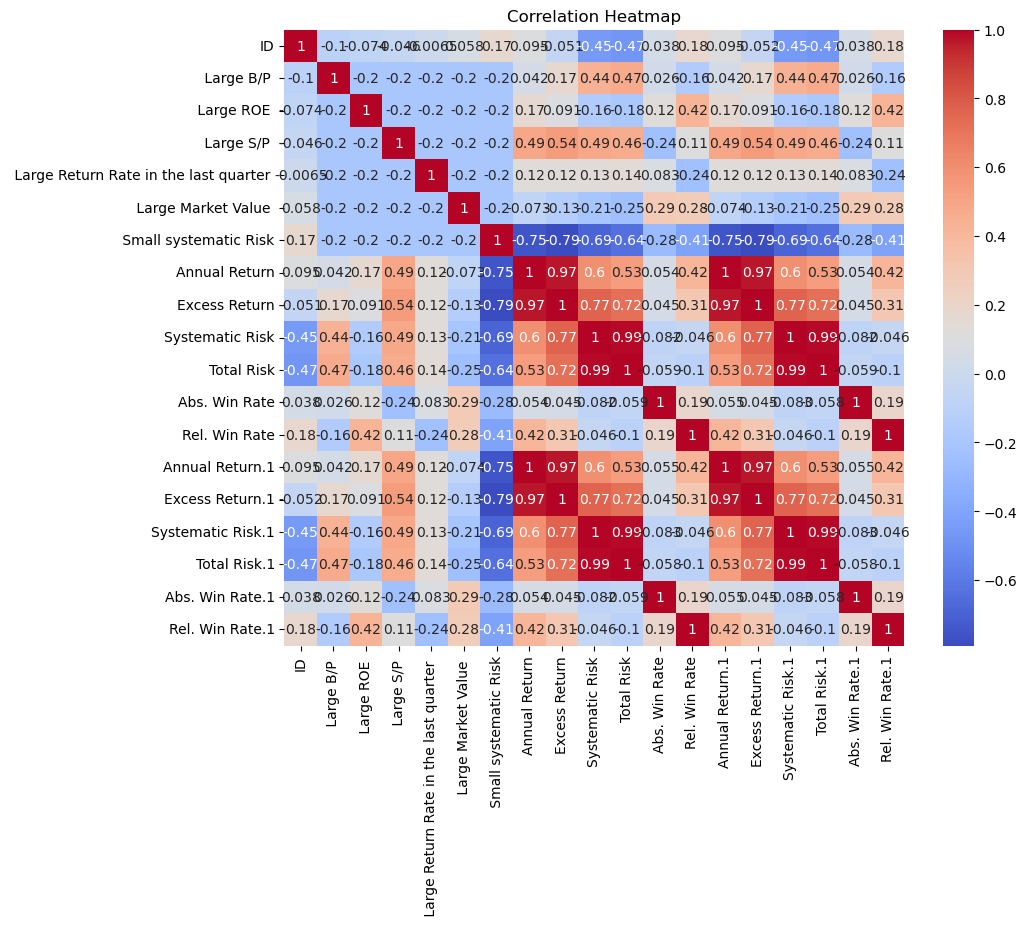

In [17]:
# Creating a heatmap to check for any correlations for future models
plt.figure(figsize=(10, 8))
sns.heatmap(stock_transformed.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

For this heatmap we can see that the correlations are all over the place but there are a few variables where there are strong correlations but are not directly our main target plan. With this project my target based off the data is the annual return. Based off this heatmap we can see that Total Risk and Systematic risk have a very strong correlation whihc makes sense because both risks take in roughly the same information, and will be used throughout the model process of this project.

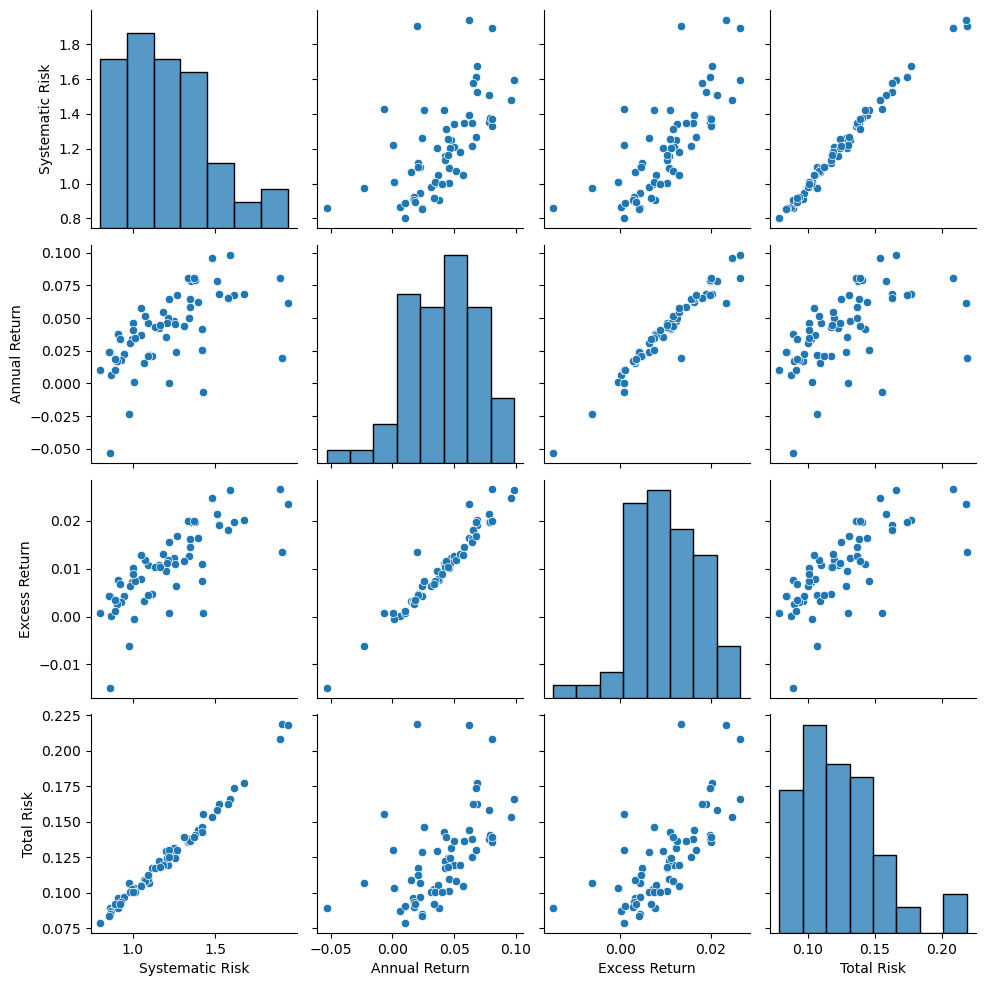

In [18]:
# Pairplot with selected features to check for possible correlations
selected_features = ['Systematic Risk', 'Annual Return', 'Excess Return', 'Total Risk']
sns.pairplot(stock_transformed[selected_features])
plt.show()

This is a shrunk down version off the correlation heatmap from above only looking at Systematic Risk, Annual Return, Excess Return, and Total Risk. These all will play key roles in the models that will later be talked about. It makes a lot of sense to see relationship between these two variables since they all have a very similar mathimatic intake when determining their outputs, so having a strong correlation between each is very normal to see. 

## Data Preprocessing

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target. Drop Annual Return since that is our target variable for these models
X = stock_transformed.drop(columns=["Annual Return"])  
y = stock_transformed["Annual Return"]

# Train-test split (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


For this part of the project as the set up portion for future models, I first started by creating X and y variables by dropping Annual Return from the X of the dataset since that is our target variable. Then after that I split the data intro a 70-30 train test split for the models to train on 70% of the data and then test based off the other 30%. These steps that I have used to help train in a properly scaleded data set and be tested in an as accurate possible setting.

## Linear Regression

Linear Regression Metrics:
MAE: 7.4503591625811e-05
MSE: 1.1576397657598037e-08
RMSE: 0.00010759366922639099
R²: 0.9999873078606296


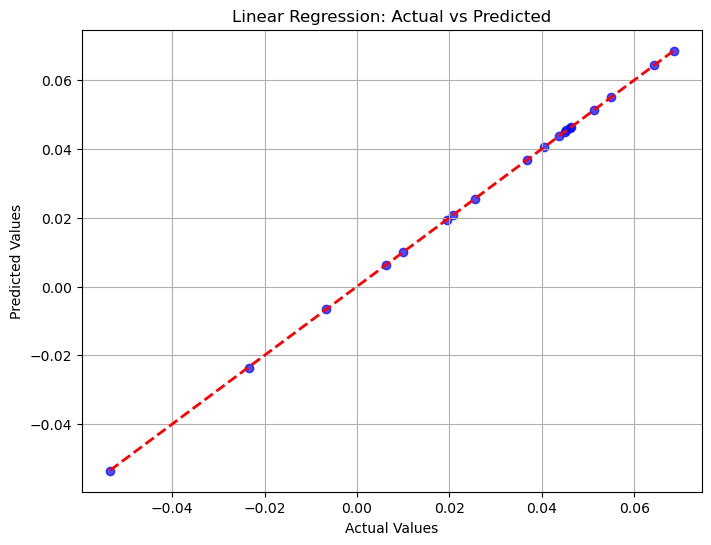

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train the model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lin_reg.predict(X_test_scaled)

# Metrics
print("Linear Regression Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R²:", r2_score(y_test, y_pred_lr))

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()


- Model Training:
    - With this model I am doing linear regression.
- Predictions:
    - The predict function that is used predicts the outputs based for the scaled test data.
- Evaluation Metrics:
    - MAE (Mean Absolute Error): Average magnitude of prediction errors (smaller is better).
    - MSE (Mean Squared Error): Average of squared errors (penalizes larger errors more heavily).
    - RMSE (Root Mean Squared Error): Square root of MSE, gives error in orginial units.
    - R^2 Score: Measures how well the model explains variance in the target variable (values close to 1 indicate a strong fit).
- Visulization: 
    - This scatter plot compares the actual and predicted values. The red dashed line represents a close prediction of the outputs based off the actual out puts. We can see that the actual points cluster close to an on the red dahsed line demonstrating a strong accurate prediction.
- Results:
    - Both the MAE and MSE are extremely small, almost zeor which indicates a highly accurate prediction for this model. Also the R^2 score of 0.999 suggest that the model explains almost all of the variance in the data, but there is a problem with that as well. One thing to point out is that the data set does appear to have a clear linear relationship between the features and the targets. But on the other hand with R^2 being extremely close to 1, there is a possiblity that the model may be overfitting, especially if this dataset is small and it is a smaller dataset.

## Polynomial Regression

In [21]:
# Generate Polynomial Features
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Train the Polynomial Regression Model
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_train_poly, y_train)

# Make Predictions
y_pred_poly = lin_reg_poly.predict(X_test_poly)

# Evaluate the Model
print("\nPolynomial Regression Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_poly))
print("MSE:", mean_squared_error(y_test, y_pred_poly))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_poly)))
print("R²:", r2_score(y_test, y_pred_poly))



Polynomial Regression Metrics:
MAE: 0.01430786370629045
MSE: 0.0005975911584709429
RMSE: 0.02444567770529062
R²: 0.3448125665519495


- MAE:
    - For polynomial regression the MAE was 0.0143 which is significantly higher than than the linear regression MAE. This suggests that the polynomial regression model makes larger errors comapred to the simpler linear model. With that being said while at times a more advanced model could improve accuracy in this instance it is hurting the models performance. 
- MSE:
    - This model's MSE was 0.000598 which is extemely low and is a good sign since we want a lower score, but it is still higher than the linear regression MSE, which in this case suggest that the polynomial struggles to generalize to unseen data.
- RMSE: 
    - This has a score of 0.0244 and that the typical error for the model is around that score for predicting the data, and this is around a 0.01% increase compared to the linear regression model whihc is small but still an increase in the wrong direction.
- R^2 Score:
    - The score for R^2 is 0.3448 and that indicates that the polynomial regression model only explains 34.38% of the variance in the target variable. This is an extreme drop from the almost 1 score for the linear regression model. This low score suggest that the polynomial model is overfitting the training data.
    
- Key Takeways:
    - Looking at MAE, MSE, RMSE, and R^2 score the polynomial regression model is performing worse based on all of those scores. It is very likely based on the output scores that the polynomial regression model is overfitting the training data and then not generalizing well to the tests set. So looking at these scores getting worse with the polynomial regression model it could be concluded that to better find the target variable the linear regression model would be a better more accurate model.

## Random Forest Regression With Hyperparameter Tuning

In [22]:
# Import model and GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the model and parameter grid
rf_reg = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Grid Search for Hyperparameter Tuning
grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best Model and Predictions
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)

# Evaluate the Model
print("\nRandom Forest Regression Metrics:")
print("Best Parameters:", grid_search.best_params_)
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R²:", r2_score(y_test, y_pred_rf))



Random Forest Regression Metrics:
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
MAE: 0.007593657894736846
MSE: 0.0002740953366447368
RMSE: 0.016555824855462104
R²: 0.6994871533979087


- Best Parameters:
    - For this random forest model it uses 200 tress for better accuracy and stability, there is no max depth which allows for more complex splits. But the fact that there is no max depth meaning that the model can continue to split which can lead to overfitting.Then for the minimum number of samples to split the node is 2 which allows the tress to grow deeper, but can also lead to overfitting. 
- MAE:
    - The MAE for this model is 0.0076 which is an improvement compared to the polynomial regression model, but is still slightly higher than the linear regression models extremely small error. 
- MSE:
    - The MSE for this random forest model is 0.000274 is smaller than the polynomial model which is a good sign as it shows that this model is improving compared to the polynomial model. ALso with a lower score it suggests that there are fewer large errors made, and demonstrates consistent prediction accuracy.
- RMSE:
    - The RMSE for this model is 0.0166, this shows good accuracy in predictions and is better than the polynomial regression model, but is still behind the linear regressions near perfect model score.
- R^2 Score:
    - This score is 0.6995 whihc explains about 69.95% of the variance in Annual Return. This score is much better than the polynomial regression score but still under performes comapred to the linear regression model.
    
- Key Takeaways:
    - The random forest model offers a good balance between the model complexity and accuracy. It does perform better than the polynomial but is still not as perceise as the linear regression model output. Using 200 estimators and allowing the trees to grow deep with no max depth likely contributes to the model capturing complex patterns while trying to avoid extreme overfitting, but some overfitting may be present. The lower R^2 score comapred to the linear model suggest that the underlying relationship between the features and the target variable may just simply be a linear relationship, making this model less optimal because this data is more linear in nature.

## Model Comparison

In [23]:
# Compares the models R^2 scores
print("\nModel Comparison:")
print(f"Linear Regression R²: {r2_score(y_test, y_pred_lr)}")
print(f"Polynomial Regression R²: {r2_score(y_test, y_pred_poly)}")
print(f"Random Forest R²: {r2_score(y_test, y_pred_rf)}")



Model Comparison:
Linear Regression R²: 0.9999873078606296
Polynomial Regression R²: 0.3448125665519495
Random Forest R²: 0.6994871533979087


- Linear Regression:
    - The linear regression model performs extremely well, explaining 99.99% of the variance in the taregt variable. This is a near perfect score which suggests that the relationship between the features and target variables is almost entirely linear.
- Polynomial Regression:
    - Compared to the linear regression score this polynomial model score is extremely poor, only explaining 34.48% of the variance. Even when adding more complexity with the quadratic terms, it performs significantly worse, this is most likely due to overfitting of the training data.
- Random Forest:
    - This model explains 69.95% of the variance. In comparision to the polynomial regression score this is a great improvement, but still is now where near liner regression. This score suggests that the dataset's pattenrs are not complex enough to beneift significantly from Random forests's ensemble learning.

## Ridge Regression

Ridge Regression Metrics:
MAE: 0.0011297393976761974
MSE: 2.9341609892459424e-06
RMSE: 0.001712939283584197
R²: 0.9967830424185218


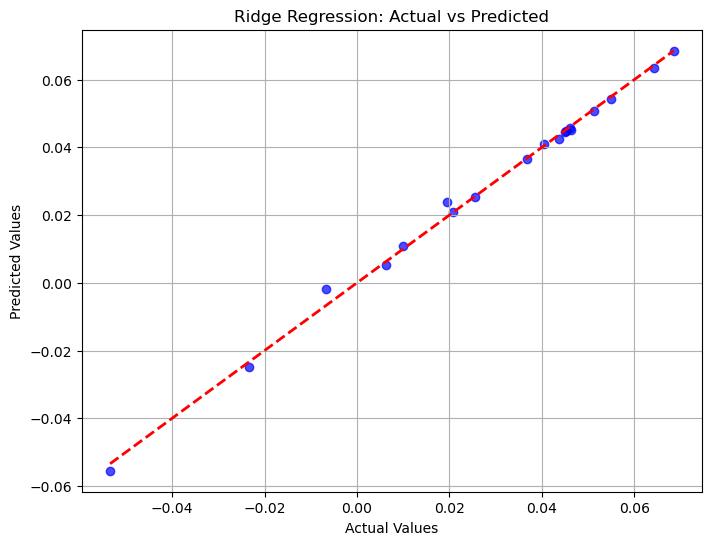

In [24]:
from sklearn.linear_model import Ridge

# Train Ridge Regression
ridge = Ridge(alpha=1.0)  # Default alpha
ridge.fit(X_train_scaled, y_train)

# Predictions
y_pred_ridge = ridge.predict(X_test_scaled)

# Metrics
print("Ridge Regression Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("R²:", r2_score(y_test, y_pred_ridge))

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title("Ridge Regression: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()


- Explanation:
    - Ridge Regression:
        - Ridge regression is a regularized version of linear regression that adds and L2 penalty to the loss function. By adding this function it helps prevent overfitting by shrinking the coefficents of less important features toward zero without completely eliminating them.

- Metrics:
    - MAE:
        - This average prediction error had a score of 0.00113 which means the model is doing well generalzing the data, but it is still higher than linear rgeression model.
    - MSE:
        - This score is 2.93e-06 which is extemely small, and with this score being so close to zero this indicates high accuracy when it comes to the model predicting the output values given the testing data.
    - RMSE:
        - The score for this ridge regression model for RMSE is 0.00171 showing excellent performance, though slightly behind the unregularized linear regression.
    - R^2 Score:
        - The R^2 score for ridgre regression is 0.99678, which indicates a strong fit for the predicted values, but again still falls slightly behind the linear regression model.
        
- Key Takeaways:
    - Ridge vs. Linear Regression:
        - The ridgre regression model performs almost as well as the unregularized linear regression model but does have a slightly higher MAE and RMSE scores. The regularization helps control for potential overfitting, though in this dataset the benefit of regularization is minimal due to the simplicity of the underlying relationships.
    - When to Use Ridge:
        - Ridge regression is particularly beneficial when the dataset has multicollinearity or when the model might overfit. In this case, the dataset appears to be well-suited for simple linear regression, so regularization has a minor impact.

## Lasso Regression

Lasso Regression Metrics:
MAE: 0.023170454545454546
MSE: 0.0012036883870704652
RMSE: 0.034694212587555076
R²: -0.31970075831412803


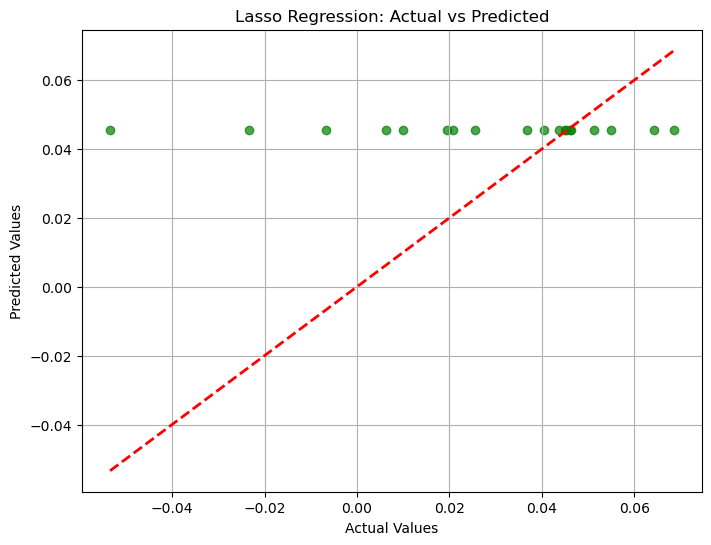

In [25]:
from sklearn.linear_model import Lasso

# Train Lasso Regression
lasso = Lasso(alpha=0.1)  # Default alpha
lasso.fit(X_train_scaled, y_train)

# Predictions
y_pred_lasso = lasso.predict(X_test_scaled)

# Metrics
print("Lasso Regression Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("R²:", r2_score(y_test, y_pred_lasso))

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title("Lasso Regression: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()


- Explanation:
    - Lassio Regression:
        - Lasso regression is a linear model that includes an L1 regularization penalty in the loss function. This type of regularization not only helps prevent overfitting but can also reduce coefficients to exactly zero, effectively performing feature selection. The alpha parameter determines the strength of the penalty. A higher alpha imposes more regularization, shrinking coefficients more aggressively.

- Metrics:
    - MAE: 
        - The average prediction error score for the lasso model is 0.0232 which is significantly larger compared to the other models we have seen so far.
    - MSE:
        - The MSE for this model is 0.0012 which is significantly higher than ridge or linear already suggesting this model is a poor fit for this data.
    - RMSE:
        - The prediction error for this model is 0.0347 which indicates a low accuracy when trying to predict the values in the dataset.
    - R^2 Score:
        - A negative R^2 score suggests the Lasso model performs worse than a simple mean prediction. This indicates significant underfitting due to overly strong regularization.
        
        
- Key Takeaways:
    - Lasso's Underperformance:
        - The alpha=0.1 appears too high for this dataset, leading to overly aggressive regularization and underfitting. The model likely eliminates some features that are essential for accurate predictions.
    - Comparison to Other Models:
        - Linear Regression and Ridge Regression both significantly outperform Lasso for this dataset. The negative R² score highlights Lasso’s unsuitability in its current configuration.
    - Adjusting Alpha: 
        - Lowering the alpha value could improve performance by reducing the regularization strength and retaining more features in the model.



## Ridge Hyperparameter Tuning

In [26]:
from sklearn.model_selection import GridSearchCV

#Defines the range of alpha values to test for Ridge regression
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}

#This initalizes the GridSearchCV with Ridge regression
ridge_grid = GridSearchCV(estimator=Ridge(), param_grid=ridge_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

#Fit the GridSearchCv to the training data
ridge_grid.fit(X_train_scaled, y_train)

print("Best Ridge Parameters:", ridge_grid.best_params_)
print("Best Ridge CV Score:", -ridge_grid.best_score_)


Best Ridge Parameters: {'alpha': 0.01}
Best Ridge CV Score: 6.470436659263052e-08


- Key Outputs:
    - Best Ridge Parameters:
        - The grid search determined that the optimal alpha value for Ridge regression is 0.01. This indicates that a very light regularization provides the best balance between bias and variance for this dataset.
    - Best Ridge CV Score:
        - The cross-validated mean squared error corresponding to the best alpha is 6.47e-08. This is a very low error, indicating that the model is highly accurate on the training data with the selected alpha value.
        
- Insights:
    - The results confirm that Ridge regression works well with minimal regularization for this dataset, likely due to the low complexity of the relationships in the data. Smaller alpha values allow the coefficients to remain closer to their unregularized counterparts, which explains the high performance with alpha = 0.01. Higher alpha values (e.g., 10 or 100) would impose too much penalty, shrinking coefficients excessively and leading to underfitting.

## Lasso Hyperparameter Tuning

In [27]:
# Define the range of alpha values to test for Lasso regression
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}

#Initialize GridSearchCV with lasso regression
lasso_grid = GridSearchCV(estimator=Lasso(), param_grid=lasso_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

#Fit the GridSearchCV to the training data
lasso_grid.fit(X_train_scaled, y_train)

print("Best Lasso Parameters:", lasso_grid.best_params_)
print("Best Lasso CV Score:", -lasso_grid.best_score_)


Best Lasso Parameters: {'alpha': 0.01}
Best Lasso CV Score: 0.00011038901573606477


- Key Outputs:
    - Best Lasso Parameters:
        - The grid search determined that the optimal alpha value for Lasso regression is 0.01. This indicates that a small regularization penalty works best for this dataset, likely retaining most features while slightly shrinking coefficients to prevent overfitting.
    - Best Lasso CV Score:
        - The cross-validated mean squared error for the best alpha value is 0.00011039. This result shows that Lasso regression performs reasonably well on the training data with this configuration, although its error is slightly higher compared to Ridge regression.

- Insights:
    - The selected alpha=0.01 is small enough to avoid excessive coefficient shrinkage or feature elimination, balancing bias and variance. Larger alpha values (e.g., 10 or 100) would impose too much regularization, likely causing underfitting, as seen in the earlier Lasso results with a default alpha of 0.1. The best Lasso model's cross-validated MSE (0.00011039) is higher than that of Ridge regression (6.47e-08). This suggests that Lasso might not be as effective for this dataset, possibly because the relationships between features and the target are not sparse (i.e., most features are relevant).

## Conclusion

After evaluating multiple regression models—Linear Regression, Polynomial Regression, Ridge Regression, Lasso Regression, and Random Forest Regression—on the dataset, we can draw the following conclusions:
- Linear Regression:
    - Achieved an exceptionally high R^2 score of 0.99999, indicating that it explains nearly all the variance in the target variable. The low error metrics (MAE, MSE, and RMSE) show that the model fits the data almost perfectly. However, this near-perfect performance could suggest potential overfitting or that the dataset has strong linear relationships.
- Polynomial Regression:
    - Despite using degree-2 polynomial features, this model underperformed with an R^2 score of 0.344, suggesting it struggles to generalize to the test set. The increased error metrics indicate that introducing polynomial terms did not capture meaningful non-linear relationships for this dataset.
- Ridge Regression:
    - With optimal hyperparameter tuning (alpha=0.01), Ridge Regression achieved an R^2 score of 0.99678, indicating strong predictive performance. The regularization in Ridge helped prevent overfitting while retaining most of the features' contribution, making it a balanced and reliable model for this dataset.
- Lasso Regression:
    - The best-tuned Lasso model (alpha=0.01) performed relatively poorly with an R^2 score of -0.3197, which indicates it failed to explain the variance in the target variable. This suggests that Lasso may not be suitable for this dataset, likely because it is not sparse, and the aggressive feature selection inherent to Lasso penalized too many coefficients.
- Random Forest Regression:
    - The optimized Random Forest model achieved a moderate R^2 score of 0.699, suggesting it captured some non-linear relationships but fell short of the performance of Linear and Ridge Regression. While Random Forests are robust and handle complex data well, they may require further tuning or more data to improve their performance.
    
    
- Final Insights
    - Best Model:
        - Linear Regression emerged as the best-performing model, achieving near-perfect predictive accuracy. This indicates that the relationships in the dataset are predominantly linear and well-explained by the features.
    - Regularization Impact:
        - Ridge Regression performed almost as well as Linear Regression, with the added benefit of handling potential multicollinearity and improving generalization.
    - Non-linear Models:
        - Polynomial Regression and Random Forest did not outperform linear models, suggesting that non-linear interactions between features and the target variable are either weak or non-existent.
    - Feature Sparsity:
        - Lasso Regression struggled significantly, likely due to its feature selection mechanism, which was not suitable for this dataset.
        
In summary, Linear and Ridge Regression models are the most suitable choices for this dataset, with Linear Regression being the simplest and most effective model.

In [29]:
pip install -U notebook-as-pdf and pyppeteer-install

Note: you may need to restart the kernel to use updated packages.Collecting notebook-as-pdf
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'



ERROR: Could not find a version that satisfies the requirement pyppeteer-install (from versions: none)
ERROR: No matching distribution found for pyppeteer-install
